# Credit card fraud detection
## EDA on train Data set

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not

Task 1: please do proper analysis of the whole data, plot all relevant plots, note down all observations.

Task 2: Let's define a matric



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

creditcard = pd.read_csv("train_data.csv")
creditcard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



In [2]:
print(creditcard.shape)

(227845, 31)


In [3]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
creditcard["Class"].value_counts()

0    227451
1       394
Name: Class, dtype: int64

## 2-D Scatter Plot

C:\Users\Win 10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


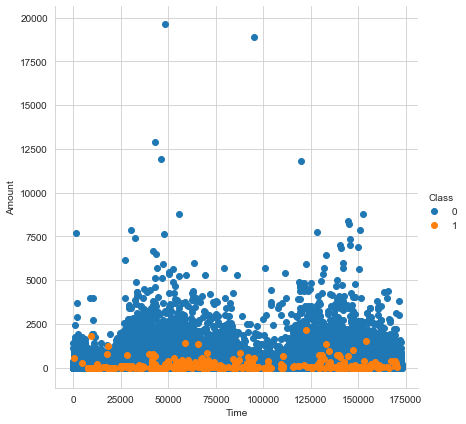

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

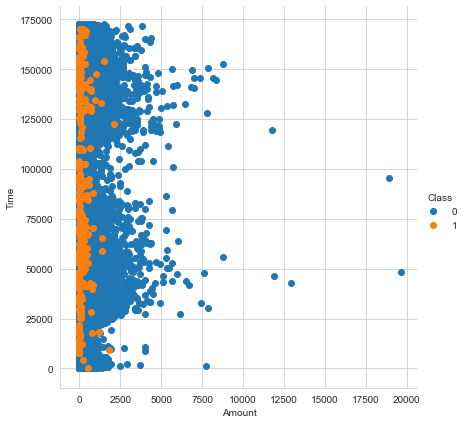

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

Observations:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

## 3D Scatter plot

In [7]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [8]:
FilteredData.head(10)

,Time,Amount,Class
0,38355.0,49.67,0
1,22555.0,16.94,0
2,2431.0,1.00,0
3,86773.0,10.78,0
4,127202.0,39.96,0
5,37590.0,1437.08,0
6,56739.0,11.10,0
7,912.0,24.08,0
8,171058.0,28.00,0
9,79450.0,1354.98,0


In [9]:
print(FilteredData.shape)

(227845, 3)


In [10]:
FilteredData["Class"].value_counts()

0    227451
1       394
Name: Class, dtype: int64

C:\Users\Win 10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Win 10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Win 10\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


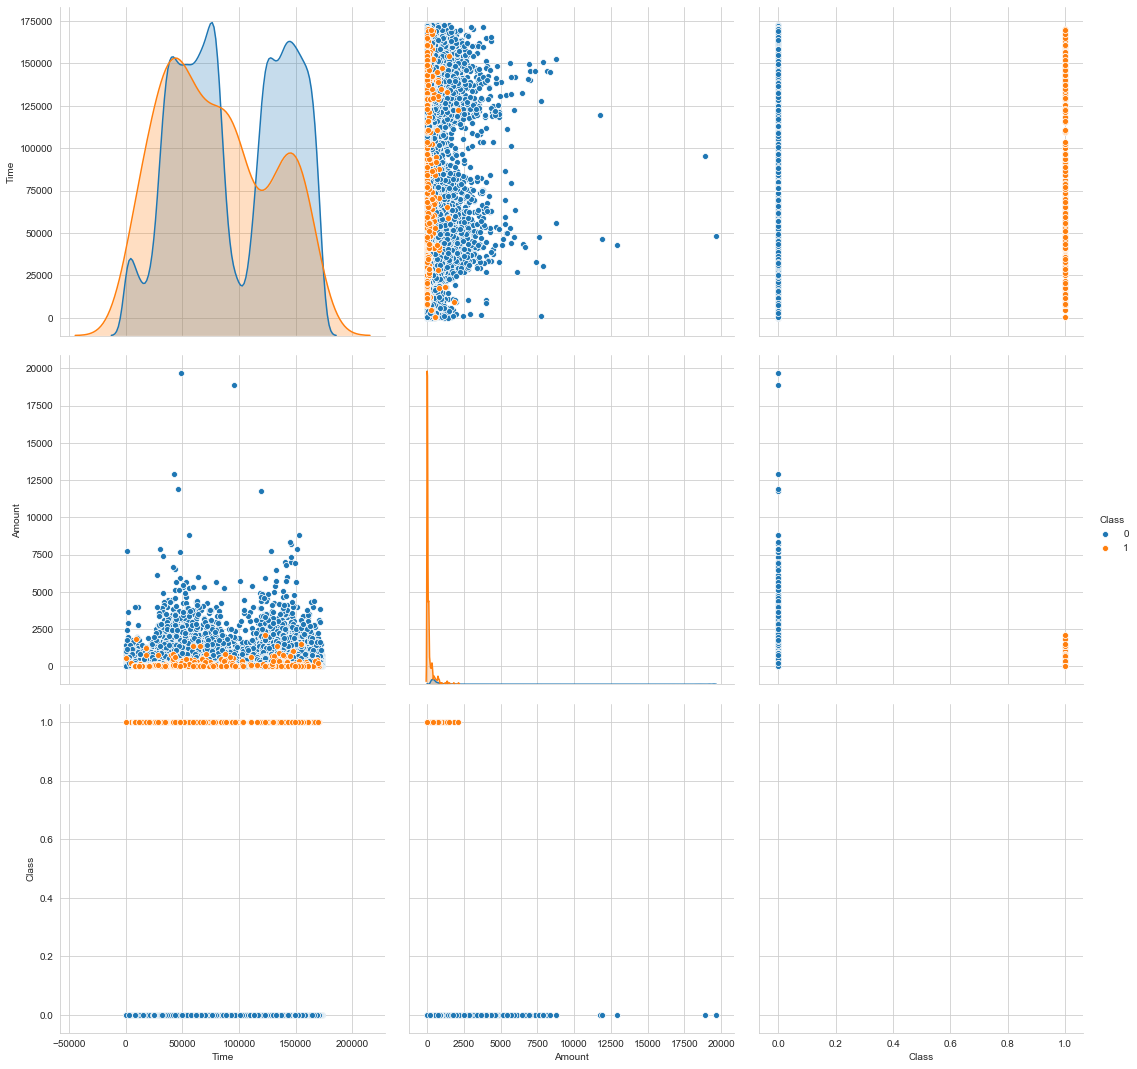

In [11]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

In [12]:
FilteredData["Class"].value_counts()

0    227451
1       394
Name: Class, dtype: int64

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,227451.0,88.455144,248.066088,0.0,5.64,22.000,77.000,19656.53
1,394.0,127.306523,264.533907,0.0,1.00,11.395,106.385,2125.87


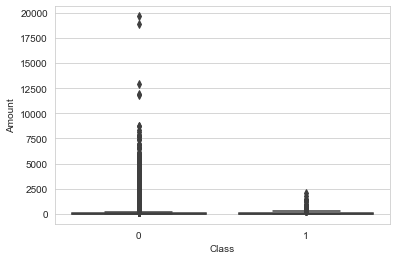

In [13]:
sns.boxplot(x="Class", y="Amount", data=FilteredData)
FilteredData.groupby('Class').Amount.describe()

Observations:
Now the total number of fraud transactions in whole data are 394. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 394.
Even though average amount of non-fraud is greater than fraud, transaction of large amount however are mostly fraud, which follows our instinct about fraud. 

## Histogram, PDF and CDF

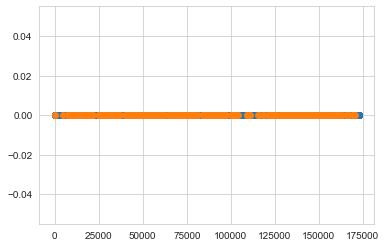

In [14]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

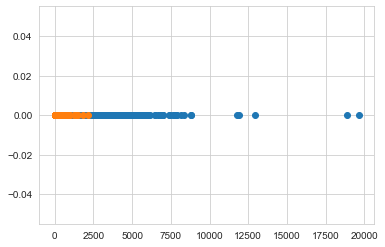

In [15]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

C:\Users\Win 10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


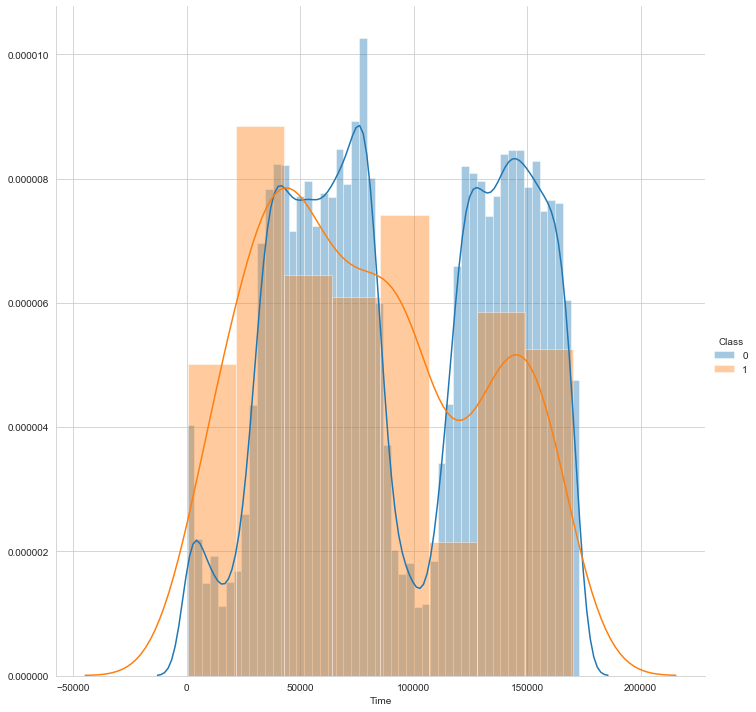

In [16]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

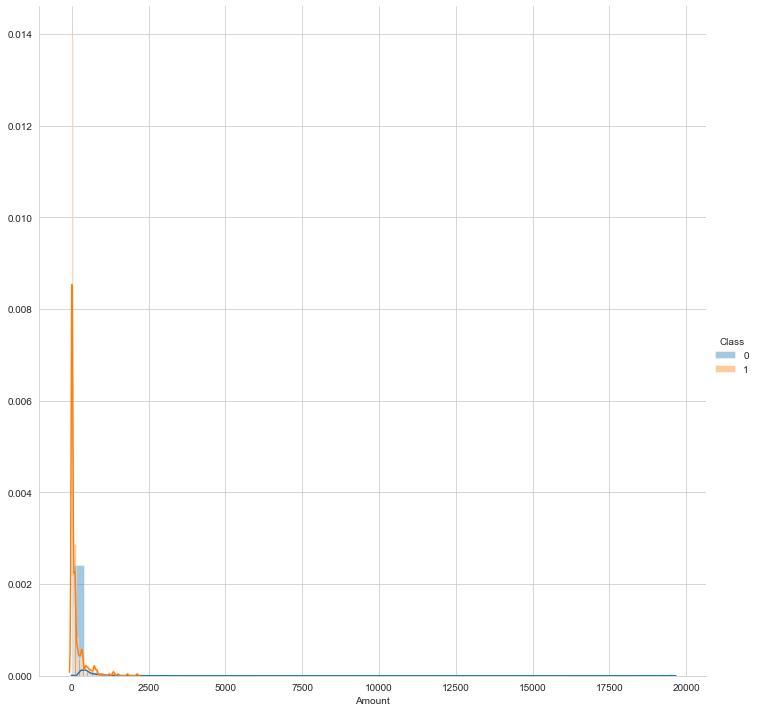

In [17]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

**Hence, this is the best histogram we have**

pdf =  [9.97384187e-01 2.15497378e-03 3.37949044e-04 7.90010753e-05
 2.19447431e-05 4.38894863e-06 8.77789725e-06 0.00000000e+00
 0.00000000e+00 8.77789725e-06]


Counts = [5.07406031e-04 1.09631444e-06 1.71927112e-07 4.01907536e-08
 1.11640982e-08 2.23281964e-09 4.46563928e-09 0.00000000e+00
 0.00000000e+00 4.46563928e-09]


Bin edges =  [    0.     1965.653  3931.306  5896.959  7862.612  9828.265 11793.918
 13759.571 15725.224 17690.877 19656.53 ]


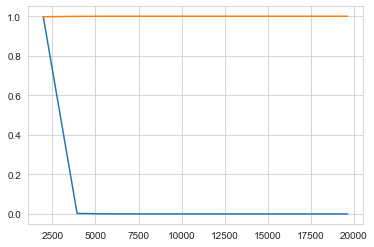

In [18]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

Observations:

Probability of the points having transaction amount approximately less than 2500 is 1, it means almost all of the transactions have transaction amount less than 2500 and cdf curve verifies this fact.

# Mean, Variance and Std-dev

In [19]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  248.0655427032189
Std-Deviation of transaction amount of fraud transactions:  264.1979911981501


In [20]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.45514361333471
Mean of transaction amount of fraud transactions:  127.30652284263951


In [21]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  11.395


In [22]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.64 22.   77.  ]
[  0.      1.     11.395 106.385]


# Box plot and Whiskers

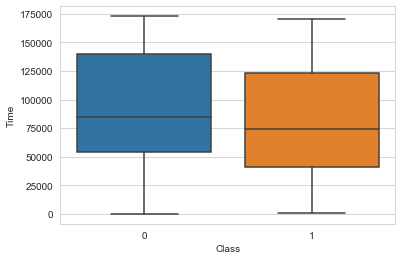

In [23]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

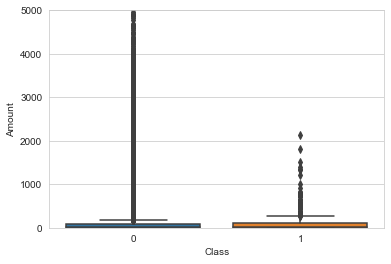

In [24]:
sns.boxplot(x = "Class", y = "Amount", data = creditcard)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

#  Separate feature data (predictors) from labels and Standardize data

In [25]:
# feature data (predictors)
X = creditcard.iloc[:, :-1]
# label class
y = creditcard['Class']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Partition data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)

# Build Differnt ML models

In [27]:
#import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [28]:
#Build Mode;
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);
#Train SVM model
SVM_Classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
SVM_Classifier.fit(X_train, y_train)

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);

# Train Decision Tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);
# Train XGBC Model
XGB_Classifier = XGBClassifier(random_state=0)
XGB_Classifier.fit(X_train, y_train)

C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Build ANN model

In [29]:
#Build ANN model
#To build ANN based model
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf
#Creating model
model2 = Sequential()
model2.add(Dense(30, input_dim=30, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 27)                837       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                560       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________


In [30]:
model2.fit( X_train , y_train , epochs =100 , batch_size = 50 )


Epoch 1/100
152656/152656 [==============================] - 3s 20us/step - loss: 0.0087 - acc: 0.9992
Epoch 2/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0032 - acc: 0.9994
Epoch 3/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0027 - acc: 0.9994
Epoch 4/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0025 - acc: 0.9994
Epoch 5/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0022 - acc: 0.9995
Epoch 6/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0021 - acc: 0.9994
Epoch 7/100
152656/152656 [==============================] - 3s 16us/step - loss: 0.0020 - acc: 0.9995
Epoch 8/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0017 - acc: 0.9996
Epoch 9/100
152656/152656 [==============================] - 2s 16us/step - loss: 0.0018 - acc: 0.9996
Epoch 10/100
152656/152656 [==============================] - 2s 16us/st

152656/152656 [==============================] - 2s 16us/step - loss: 3.4939e-04 - acc: 0.9999
Epoch 76/100
152656/152656 [==============================] - 2s 16us/step - loss: 5.3081e-04 - acc: 0.9999
Epoch 77/100
152656/152656 [==============================] - 2s 16us/step - loss: 3.7702e-04 - acc: 0.9999
Epoch 78/100
152656/152656 [==============================] - 2s 16us/step - loss: 3.0100e-04 - acc: 0.9999
Epoch 79/100
152656/152656 [==============================] - 2s 16us/step - loss: 4.7281e-04 - acc: 0.9999
Epoch 80/100
152656/152656 [==============================] - 2s 16us/step - loss: 5.7396e-04 - acc: 0.9999
Epoch 81/100
152656/152656 [==============================] - 2s 16us/step - loss: 3.5405e-04 - acc: 0.9999
Epoch 82/100
152656/152656 [==============================] - 2s 16us/step - loss: 5.2714e-04 - acc: 0.9999
Epoch 83/100
152656/152656 [==============================] - 2s 16us/step - loss: 4.3479e-04 - acc: 0.9999
Epoch 84/100
152656/152656 [=============

In [31]:
# Evaluate models
from sklearn import metrics
modlist = [('Logistic Regression', LGR_Classifier),('SVM Classifier',SVM_Classifier),
           ('Naive Baiye Classifier', BNB_Classifier),('RandomForest Classifier', RDF_Classifier),
           ('XGBoost Classifier',XGB_Classifier),('ANN Classifier',model2)] 
models = [j for j in modlist]
precision=[j for j in modlist]
recall=[j for j in modlist]
f1=[j for j in modlist]
auc=[j for j in modlist]
k=0
print()
print('=============Model Evaluation Results with Original Data Set ========================'"\n")  
for i, v in models:
    precision[k] = metrics.precision_score(y_train, v.predict(X_train).round())
    recall[k]=metrics.recall_score(y_train, v.predict(X_train).round())
    f1[k] = metrics.f1_score(y_train, v.predict(X_train).round())
    auc[k] = metrics.roc_auc_score(y_train, v.predict(X_train).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision[k])  
    print('Recall: %f' % recall[k])
    print('F1 score: %f' % f1[k])
    print('ROC AUC: %f' % auc[k])
    print()
    k=k+1



=============Model Evaluation Results with Original Data Set ========================

===== Logistic Regression =====
Precision: 0.874346
Recall: 0.625468
F1 score: 0.729258
ROC AUC: 0.812655

===== SVM Classifier =====
Precision: 0.832685
Recall: 0.801498
F1 score: 0.816794
ROC AUC: 0.900608

===== Naive Baiye Classifier =====
Precision: 0.816514
Recall: 0.666667
F1 score: 0.734021
ROC AUC: 0.833202

===== RandomForest Classifier =====
Precision: 1.000000
Recall: 0.951311
F1 score: 0.975048
ROC AUC: 0.975655

===== XGBoost Classifier =====
Precision: 0.982833
Recall: 0.857678
F1 score: 0.916000
ROC AUC: 0.928826

===== ANN Classifier =====
Precision: 0.985075
Recall: 0.988764
F1 score: 0.986916
ROC AUC: 0.994369



In [32]:
#To plot confusion matrix
def plot_confusion_matrix(cm, classes, title, cmap):
    "function for plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()



========================== Model Test Results ========================

===== Logistic Regression =====
Precision: 0.874346
Recall: 0.625468
F1 score: 0.729258
ROC AUC: 0.812655



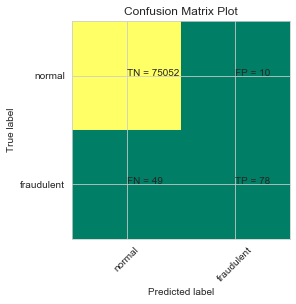

===== SVM Classifier =====
Precision: 0.832685
Recall: 0.801498
F1 score: 0.816794
ROC AUC: 0.900608



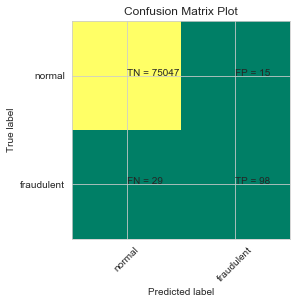

===== Naive Baiye Classifier =====
Precision: 0.816514
Recall: 0.666667
F1 score: 0.734021
ROC AUC: 0.833202



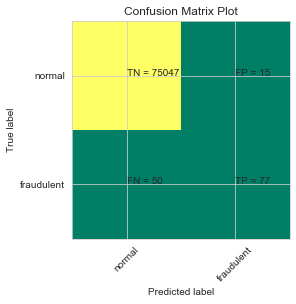

===== RandomForest Classifier =====
Precision: 1.000000
Recall: 0.951311
F1 score: 0.975048
ROC AUC: 0.975655



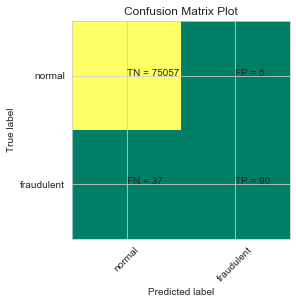

===== XGBoost Classifier =====
Precision: 0.982833
Recall: 0.857678
F1 score: 0.916000
ROC AUC: 0.928826



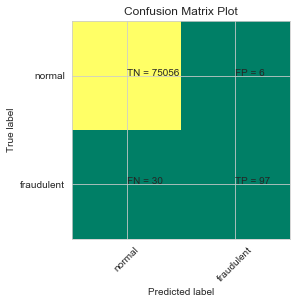

===== ANN Classifier =====
Precision: 0.985075
Recall: 0.988764
F1 score: 0.986916
ROC AUC: 0.994369



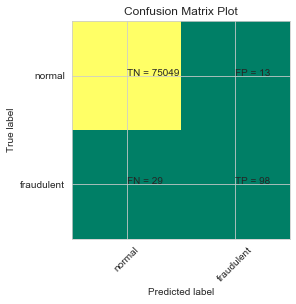

In [33]:
# Test models

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
precision_t=[j for j in modlist]
recall_t=[j for j in modlist]
f1_t=[j for j in modlist]
auc_t=[j for j in modlist]
k=0
for i, v in models:
    precision_t[k] = metrics.precision_score(y_test, v.predict(X_test).round())
    recall_t[k]=metrics.recall_score(y_test, v.predict(X_test).round())
    f1_t[k] = metrics.f1_score(y_test, v.predict(X_test).round())
    auc_t[k]= metrics.roc_auc_score(y_test, v.predict(X_test).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision[k])  
    print('Recall: %f' % recall[k])
    print('F1 score: %f' % f1[k])
    print('ROC AUC: %f' % auc[k])
    print()
    k=k+1
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test).round())
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    

# Data sampling
As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, we will use  oversampling method and Under sampling method and check the model what we build

# UnderSampling


In [34]:
fraud_record = 394
frauds = np.array(creditcard[creditcard.Class == 1].index)
nonfrauds = creditcard[creditcard.Class == 0].index
random_nonfrauds = np.random.choice(nonfrauds, fraud_record, replace = False)
random_nonfrauds = np.array(random_nonfrauds)
Newsample = np.concatenate([frauds,random_nonfrauds])
CrediUnderSample = creditcard.iloc[Newsample,:]
CrediUnderSample.count()

Time      788
V1        788
V2        788
V3        788
V4        788
V5        788
V6        788
V7        788
V8        788
V9        788
V10       788
V11       788
V12       788
V13       788
V14       788
V15       788
V16       788
V17       788
V18       788
V19       788
V20       788
V21       788
V22       788
V23       788
V24       788
V25       788
V26       788
V27       788
V28       788
Amount    788
Class     788
dtype: int64

In [35]:
scaled_X = scaler.fit_transform(CrediUnderSample)
Xus = CrediUnderSample.ix[:, CrediUnderSample.columns != 'Class']
yus = CrediUnderSample.ix[:, CrediUnderSample.columns == 'Class']
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(Xus, yus, test_size=0.30, random_state=101)


C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
#Build Mode;
# Train LogisticRegression Model
LGR_Classifier_us = LogisticRegression()
LGR_Classifier_us.fit(X_us_train,y_us_train);
#Train SVM model
SVM_Classifier_us= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
SVM_Classifier_us.fit(X_us_train,y_us_train);

# Train Bernoulli Naive Baye Model
BNB_Classifier_us = BernoulliNB()
BNB_Classifier_us.fit(X_us_train,y_us_train);

# Train Decision Tree Model
RDF_Classifier_us= RandomForestClassifier(random_state=0)
RDF_Classifier_us.fit(X_us_train,y_us_train);
# Train XGBC Model
XGB_Classifier_us = XGBClassifier(random_state=0)
XGB_Classifier_us.fit(X_us_train,y_us_train);

C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

In [37]:
#Creating model
model2_us = Sequential()
model2_us.add(Dense(30, input_dim=30, activation='relu')) 
model2_us.add(Dense(15, activation='relu'))
model2_us.add(Dense(7, activation='relu'))
model2_us.add(Dense(1, activation='sigmoid'))
model2_us.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_us.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 8         
Total params: 1,515
Trainable params: 1,515
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2_us.fit(X_us_train,y_us_train,epochs = 400 , batch_size = 300 )

Epoch 1/400
551/551 [==============================] - 0s 508us/step - loss: 7.9567 - acc: 0.5064
Epoch 2/400
551/551 [==============================] - 0s 7us/step - loss: 7.9567 - acc: 0.5064
Epoch 3/400
551/551 [==============================] - 0s 9us/step - loss: 7.9567 - acc: 0.5064
Epoch 4/400
551/551 [==============================] - 0s 11us/step - loss: 7.9486 - acc: 0.5064
Epoch 5/400
551/551 [==============================] - 0s 9us/step - loss: 7.9274 - acc: 0.5082
Epoch 6/400
551/551 [==============================] - 0s 7us/step - loss: 7.9274 - acc: 0.5082
Epoch 7/400
551/551 [==============================] - 0s 11us/step - loss: 7.9011 - acc: 0.5082
Epoch 8/400
551/551 [==============================] - 0s 9us/step - loss: 8.0203 - acc: 0.4936
Epoch 9/400
551/551 [==============================] - 0s 7us/step - loss: 8.0712 - acc: 0.4936
Epoch 10/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 11/400
551/551 [=============

551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 86/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 87/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 88/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 89/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 90/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 91/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 92/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 93/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 94/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 95/400
551/551 [=====================

551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 169/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 170/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 171/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 172/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 173/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 174/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 175/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 176/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 177/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 178/400
551/551 [===========

551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 252/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 253/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 254/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 255/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 256/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 257/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 258/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 259/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 260/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 261/400
551/551 [===========

551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 335/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 336/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 337/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 338/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 339/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 340/400
551/551 [==============================] - 0s 7us/step - loss: 8.0725 - acc: 0.4936
Epoch 341/400
551/551 [==============================] - 0s 5us/step - loss: 8.0725 - acc: 0.4936
Epoch 342/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 343/400
551/551 [==============================] - 0s 9us/step - loss: 8.0725 - acc: 0.4936
Epoch 344/400
551/551 [===========

In [39]:
# Evaluate models
from sklearn import metrics
modlist_us = [('Logistic Regression', LGR_Classifier_us),('SVM Classifier',SVM_Classifier_us),
           ('Naive Baiye Classifier', BNB_Classifier_us),('RandomForest Classifier', RDF_Classifier_us),
           ('XGBoost Classifier',XGB_Classifier_us),('ANN Classifier',model2_us)] 
models_us = [j for j in modlist_us]
precision_us=[j for j in modlist_us]
recall_us=[j for j in modlist_us]
f1_us=[j for j in modlist_us]
auc_us=[j for j in modlist_us]
k=0
print()
print('=============Model Evaluation Results with Undersampling Data Set ========================'"\n")  
for i, v in models_us:
    precision_us[k] = metrics.precision_score(y_us_train, v.predict(X_us_train).round())
    recall_us[k]=metrics.recall_score(y_us_train, v.predict(X_us_train).round())
    f1_us[k] = metrics.f1_score(y_us_train, v.predict(X_us_train).round())
    auc_us[k] = metrics.roc_auc_score(y_us_train, v.predict(X_us_train).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision_us[k])  
    print('Recall: %f' % recall_us[k])
    print('F1 score: %f' % f1_us[k])
    print('ROC AUC: %f' % auc_us[k])
    print()
    k=k+1


=============Model Evaluation Results with Undersampling Data Set ========================

===== Logistic Regression =====
Precision: 0.975510
Recall: 0.878676
F1 score: 0.924565
ROC AUC: 0.928586

===== SVM Classifier =====
Precision: 0.986047
Recall: 0.779412
F1 score: 0.870637
ROC AUC: 0.884330

===== Naive Baiye Classifier =====
Precision: 0.991031
Recall: 0.812500
F1 score: 0.892929
ROC AUC: 0.902666

===== RandomForest Classifier =====
Precision: 1.000000
Recall: 0.988971
F1 score: 0.994455
ROC AUC: 0.994485

===== XGBoost Classifier =====
Precision: 1.000000
Recall: 0.996324
F1 score: 0.998158
ROC AUC: 0.998162

===== ANN Classifier =====
Precision: 0.493648
Recall: 1.000000
F1 score: 0.660996
ROC AUC: 0.500000




========================== Model Test Results ========================

===== Logistic Regression =====
Precision: 0.973913
Recall: 0.918033
F1 score: 0.945148
ROC AUC: 0.945973



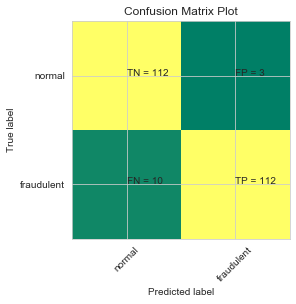

===== SVM Classifier =====
Precision: 0.990654
Recall: 0.868852
F1 score: 0.925764
ROC AUC: 0.930078



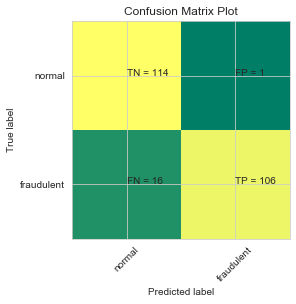

===== Naive Baiye Classifier =====
Precision: 1.000000
Recall: 0.860656
F1 score: 0.925110
ROC AUC: 0.930328



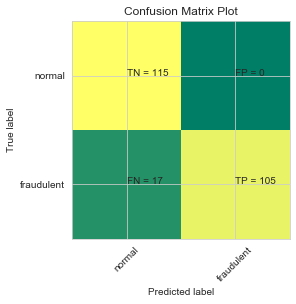

===== RandomForest Classifier =====
Precision: 0.982301
Recall: 0.909836
F1 score: 0.944681
ROC AUC: 0.946222



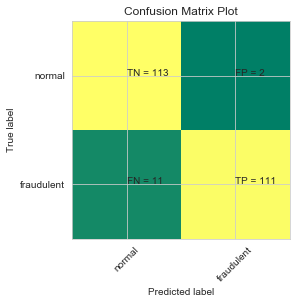

===== XGBoost Classifier =====
Precision: 0.982906
Recall: 0.942623
F1 score: 0.962343
ROC AUC: 0.962616



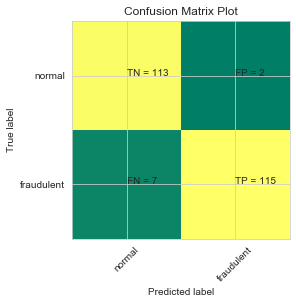

===== ANN Classifier =====
Precision: 0.514768
Recall: 1.000000
F1 score: 0.679666
ROC AUC: 0.500000



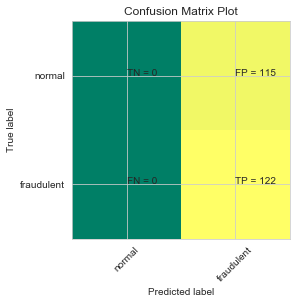

In [40]:
# Test models

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
precision_us_t=[j for j in modlist_us]
recall_us_t=[j for j in modlist_us]
f1_us_t=[j for j in modlist_us]
auc_us_t=[j for j in modlist_us]
k=0
for i, v in models_us:
    precision_us_t[k]= metrics.precision_score(y_us_test, v.predict(X_us_test).round())
    recall_us_t[k]=metrics.recall_score(y_us_test, v.predict(X_us_test).round())
    f1_us_t[k] = metrics.f1_score(y_us_test, v.predict(X_us_test).round())
    auc_us_t[k]= metrics.roc_auc_score(y_us_test, v.predict(X_us_test).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision_us_t[k])  
    print('Recall: %f' % recall_us_t[k])
    print('F1 score: %f' % f1_us_t[k])
    print('ROC AUC: %f' % auc_us_t[k])
    print()
    k=k+1
    confusion_matrix_us= metrics.confusion_matrix(y_us_test, v.predict(X_us_test).round())
    plot_confusion_matrix(confusion_matrix_us, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    

# Over Sampling

In [41]:
#from imblearn.over_sampling import SMOTE
#oversampler=SMOTE(random_state=0)
#X_train_smote,y_train_smote=oversampler.fit_sample(X_train,y_train)
# separate minority and majority classes
from sklearn.utils import resample
not_fraud = creditcard[creditcard.Class==0]
fraud = creditcard[creditcard.Class==1]
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])
Xos = upsampled.ix[:, CrediUnderSample.columns != 'Class']
yos = upsampled.ix[:, CrediUnderSample.columns == 'Class']
scaled_Xos = scaler.fit_transform(Xos)
X_train_smote, X_os_test, y_train_smote, y_os_test = train_test_split(scaled_Xos, yos, test_size=0.30, random_state=101)
upsampled.Class.value_counts()  

C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\Win 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


1    227451
0    227451
Name: Class, dtype: int64

In [47]:
#Build Mode;
# Train LogisticRegression Model
LGR_Classifier_os = LogisticRegression()
LGR_Classifier_os.fit(X_train_smote,y_train_smote);
#Train SVM model
SVM_Classifier_os= svm.SVC(C= 1, kernel= 'linear', random_state= 0)
SVM_Classifier_os.fit(X_train_smote,y_train_smote);

# Train Bernoulli Naive Baye Model
BNB_Classifier_os = BernoulliNB()
BNB_Classifier_os.fit(X_train_smote,y_train_smote);

# Train Decision Tree Model
RDF_Classifier_os= RandomForestClassifier(random_state=0)
RDF_Classifier_os.fit(X_train_smote,y_train_smote);
# Train XGBC Model
XGB_Classifier_os = XGBClassifier(random_state=0)
XGB_Classifier_os.fit(X_train_smote,y_train_smote);

C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Win 10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

In [48]:
model2_os = Sequential()
model2_os.add(Dense(30, input_dim=30, activation='relu')) 
model2_os.add(Dense(15, activation='relu'))
model2_os.add(Dense(7, activation='relu'))
model2_os.add(Dense(1, activation='sigmoid'))
model2_os.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_os.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 8         
Total params: 1,515
Trainable params: 1,515
Non-trainable params: 0
_________________________________________________________________


#Creating model
model2_os = Sequential()
model2_os.add(Dense(30, input_dim=30, activation='relu')) 
model2_os.add(Dense(27, activation='relu'))
model2_os.add(Dense(20, activation='relu'))
model2_os.add(Dense(15, activation='relu'))
model2_os.add(Dense(1, activation='sigmoid'))
model2_os.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_os.summary()

In [49]:

model2_os.fit(X_train_smote,y_train_smote,epochs = 50 , batch_size = 50)

Epoch 1/50
318431/318431 [==============================] - 6s 18us/step - loss: 0.0522 - acc: 0.9818
Epoch 2/50
318431/318431 [==============================] - 7s 21us/step - loss: 0.0107 - acc: 0.9974
Epoch 3/50
318431/318431 [==============================] - 6s 18us/step - loss: 0.0077 - acc: 0.9984
Epoch 4/50
318431/318431 [==============================] - 6s 18us/step - loss: 0.0062 - acc: 0.9987
Epoch 5/50
318431/318431 [==============================] - 5s 16us/step - loss: 0.0053 - acc: 0.9990
Epoch 6/50
318431/318431 [==============================] - 5s 16us/step - loss: 0.0048 - acc: 0.9991
Epoch 7/50
318431/318431 [==============================] - 5s 15us/step - loss: 0.0053 - acc: 0.9991
Epoch 8/50
318431/318431 [==============================] - 5s 16us/step - loss: 0.0114 - acc: 0.9989
Epoch 9/50
318431/318431 [==============================] - 5s 17us/step - loss: 0.0037 - acc: 0.9993
Epoch 10/50
318431/318431 [==============================] - 5s 17us/step - loss: 

In [50]:
# Evaluate models
modlist_os = [('Logistic Regression', LGR_Classifier_os),('SVM Classifier',SVM_Classifier_os),
           ('Naive Baiye Classifier', BNB_Classifier_os),('RandomForest Classifier', RDF_Classifier_os),
           ('XGBoost Classifier',XGB_Classifier_os),('ANN Classifier',model2_os)] 
models_os= [j for j in modlist_os]
precision_os= [j for j in modlist_os]
recall_os= [j for j in modlist_os]
f1_os= [j for j in modlist_os]
auc_os= [j for j in modlist_os]
k=0
print()
print('=============Model Evaluation Results with Oversampling Data Set ========================'"\n")  
for i, v in models_os:
    precision_os[k] = metrics.precision_score(y_train_smote, v.predict(X_train_smote).round())
    recall_os[k]=metrics.recall_score(y_train_smote, v.predict(X_train_smote).round())
    f1_os[k] = metrics.f1_score(y_train_smote, v.predict(X_train_smote).round())
    auc_os[k] = metrics.roc_auc_score(y_train_smote, v.predict(X_train_smote).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision_os[k])  
    print('Recall: %f' % recall_os[k])
    print('F1 score: %f' % f1_os[k])
    print('ROC AUC: %f' % auc_os[k])
    print()
    k=k+1


=============Model Evaluation Results with Oversampling Data Set ========================

===== Logistic Regression =====
Precision: 0.977869
Recall: 0.929151
F1 score: 0.952888
ROC AUC: 0.954068

===== SVM Classifier =====
Precision: 0.977182
Recall: 0.931720
F1 score: 0.953910
ROC AUC: 0.954988

===== Naive Baiye Classifier =====
Precision: 0.991430
Recall: 0.835094
F1 score: 0.906571
ROC AUC: 0.913939

===== RandomForest Classifier =====
Precision: 0.999987
Recall: 1.000000
F1 score: 0.999994
ROC AUC: 0.999994

===== XGBoost Classifier =====
Precision: 0.995311
Recall: 0.997569
F1 score: 0.996439
ROC AUC: 0.996436

===== ANN Classifier =====
Precision: 0.999723
Recall: 0.997587
F1 score: 0.998654
ROC AUC: 0.998656




========================== Model Test Results ========================

===== Logistic Regression =====
Precision: 0.973913
Recall: 0.918033
F1 score: 0.945148
ROC AUC: 0.945973



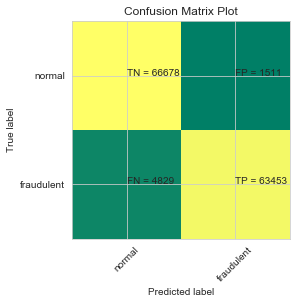

===== SVM Classifier =====
Precision: 0.990654
Recall: 0.868852
F1 score: 0.925764
ROC AUC: 0.930078



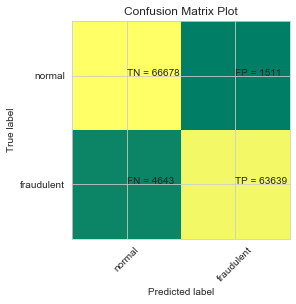

===== Naive Baiye Classifier =====
Precision: 1.000000
Recall: 0.860656
F1 score: 0.925110
ROC AUC: 0.930328



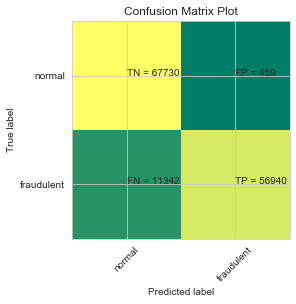

===== RandomForest Classifier =====
Precision: 0.982301
Recall: 0.909836
F1 score: 0.944681
ROC AUC: 0.946222



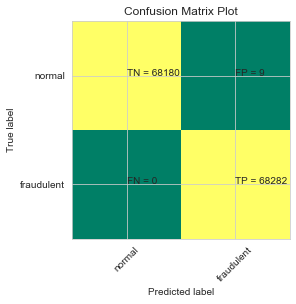

===== XGBoost Classifier =====
Precision: 0.982906
Recall: 0.942623
F1 score: 0.962343
ROC AUC: 0.962616



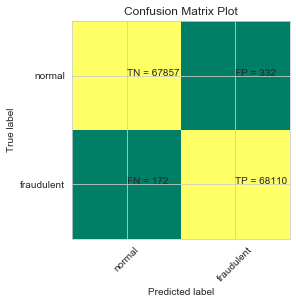

===== ANN Classifier =====
Precision: 0.514768
Recall: 1.000000
F1 score: 0.679666
ROC AUC: 0.500000



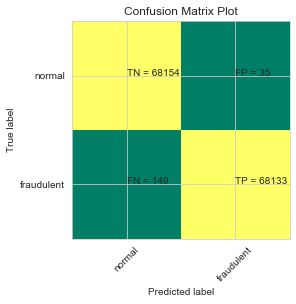

In [59]:
# Test models

classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model Test Results ========================' "\n")   
precision_os_t=[j for j in modlist_os]
recall_os_t=[j for j in modlist_os]
f1_os_t=[j for j in modlist_os]
auc_os_t=[j for j in modlist_os]
for i, v in models_os:
    precision_os_t[k]= metrics.precision_score(y_os_test, v.predict(X_os_test).round())
    recall_os_t[k]=metrics.recall_score(y_os_test, v.predict(X_os_test).round())
    f1_os_t[k] = metrics.f1_score(y_os_test, v.predict(X_os_test).round())
    auc_os_t[k]= metrics.roc_auc_score(y_os_test, v.predict(X_os_test).round())
    print('===== {} ====='.format(i))
    print ('Precision: %f' % precision_us_t[k])  
    print('Recall: %f' % recall_us_t[k])
    print('F1 score: %f' % f1_us_t[k])
    print('ROC AUC: %f' % auc_us_t[k])
    print()
    k=k+1
    confusion_matrix_us= metrics.confusion_matrix(y_os_test, v.predict(X_os_test).round())
    plot_confusion_matrix(confusion_matrix_us, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap=plt.cm.summer)
    

In [61]:
import plotly.graph_objects as go
model_list=['Logistic Regression','SVM Classifier','Naive Baiye Classifier','RandomForest Classifier',
             'XGBoost Classifier','ANN Classifier']
parameters=['Model', 'precision','recall','F1 score','ROC AUC']
ori=np.asarray([precision_t,recall_t,f1_t,auc_t]).round(4)
us=np.asarray([precision_us_t,recall_us_t,f1_us_t,auc_us_t]).round(4)
os=np.asarray([precision_os_t,recall_os_t,f1_os_t,auc_os_t]).round(4)
fig1 = go.Figure(data=[go.Table(header=dict(values=parameters),cells=dict(values=[model_list,ori[0,:],ori[1,:],ori[2,:],ori[3,:]]))])
fig2 = go.Figure(data=[go.Table(header=dict(values=parameters),cells=dict(values=[model_list,us[0,:],us[1,:],us[2,:],us[3,:]]))])
fig3 = go.Figure(data=[go.Table(header=dict(values=parameters),cells=dict(values=[model_list,os[0,:],os[1,:],os[2,:],os[3,:]]))])                               
print('=============================== Model Test Results with Original Dataset===============================' "\n") 
fig1.show()    
print('=============================== Model Test Results with Undersampling Dataset===============================' "\n") 
fig2.show()  
print('=============================== Model Test Results with Oversampling Dataset===============================' "\n") 
fig3.show()                                  

=============================== Model Test Results with Original Dataset===============================



=============================== Model Test Results with Undersampling Dataset===============================



=============================== Model Test Results with Oversampling Dataset===============================



# From above table XGboost technique perform well in all three kind dataset. So we can mdel this system use xgboost method